# Notebook Prediction Stock Market

In [1]:
import yfinance as yf
import pandas as pd
import os

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-23 00:00:00-04:00,5834.500000,5834.850098,5762.410156,5797.419922,3532650000,0.0,0.0
2024-10-24 00:00:00-04:00,5817.799805,5817.799805,5784.919922,5809.859863,3543030000,0.0,0.0
2024-10-25 00:00:00-04:00,5826.750000,5862.819824,5799.979980,5808.120117,3501280000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-10-16 00:00:00-04:00', '2024-10-17 00:00:00-04:00',
               '2024-10-18 00:00:00-04:00', '2024-10-21 00:00:00-04:00',
               '2024-10-22 00:00:00-04:00', '2024-10-23 00:00:00-04:00',
               '2024-10-24 00:00:00-04:00', '2024-10-25 00:00:00-04:00',
               '2024-10-28 00:00:00-04:00', '2024-10-29 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24324, freq=None)

<Axes: xlabel='Date'>

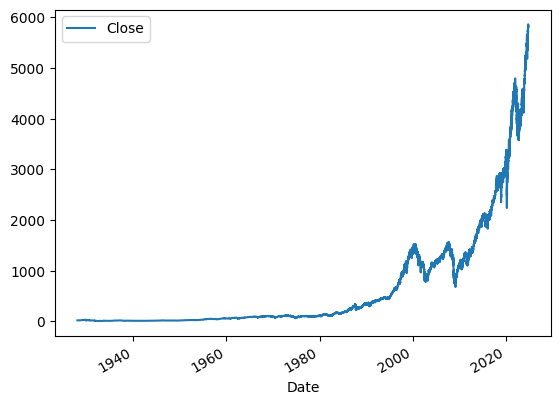

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-10-23 00:00:00-04:00,5834.500000,5834.850098,5762.410156,5797.419922,3532650000,5809.859863
2024-10-24 00:00:00-04:00,5817.799805,5817.799805,5784.919922,5809.859863,3543030000,5808.120117
2024-10-25 00:00:00-04:00,5826.750000,5862.819824,5799.979980,5808.120117,3501280000,5823.520020


In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-10-23 00:00:00-04:00,5834.500000,5834.850098,5762.410156,5797.419922,3532650000,5809.859863,1
2024-10-24 00:00:00-04:00,5817.799805,5817.799805,5784.919922,5809.859863,3543030000,5808.120117,0
2024-10-25 00:00:00-04:00,5826.750000,5862.819824,5799.979980,5808.120117,3501280000,5823.520020,1


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-10-23 00:00:00-04:00,5834.500000,5834.850098,5762.410156,5797.419922,3532650000,5809.859863,1
2024-10-24 00:00:00-04:00,5817.799805,5817.799805,5784.919922,5809.859863,3543030000,5808.120117,0
2024-10-25 00:00:00-04:00,5826.750000,5862.819824,5799.979980,5808.120117,3501280000,5823.520020,1


In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)